In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns

from sklearn import decomposition
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [4]:
print(iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
df['Class']=iris.target

In [9]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df.shape

(150, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Class                150 non-null int32
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [13]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [14]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
sepal length (cm),1.000000,-0.109369,0.871754,0.817954,0.782561
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal length (cm),0.871754,-0.420516,1.000000,0.962757,0.949043
petal width (cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


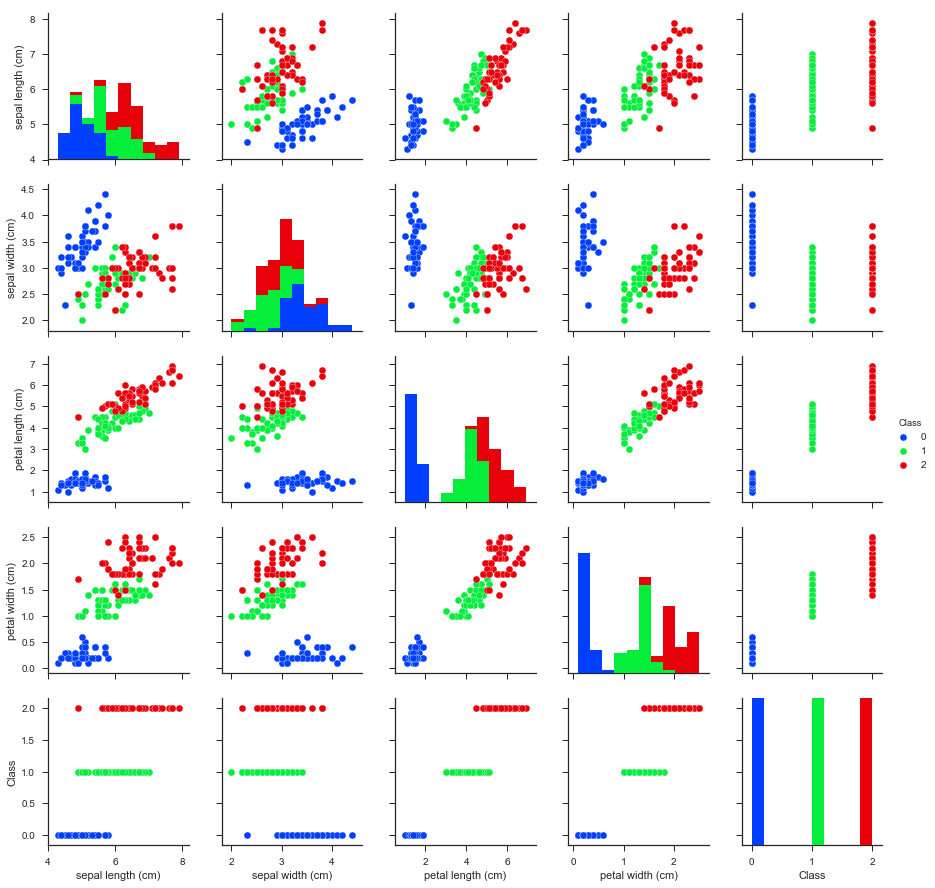

In [17]:
sns.set(style="ticks")

sns.pairplot(df, hue="Class",palette="bright")
plt.show()

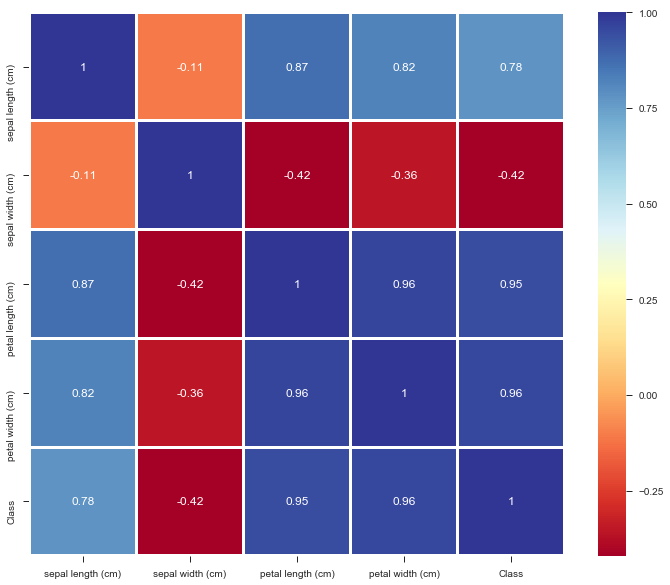

In [31]:
plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot= True, linewidth = '2',cmap ='RdYlBu')

In [18]:
X = df.drop('Class', 1)
y = df['Class']

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_PCA = pca.fit_transform(X)

In [20]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514])

In [22]:
per_var=np.round(pca.explained_variance_ratio_*100, decimals=1)

In [23]:
per_var

array([92.5,  5.3,  1.7])

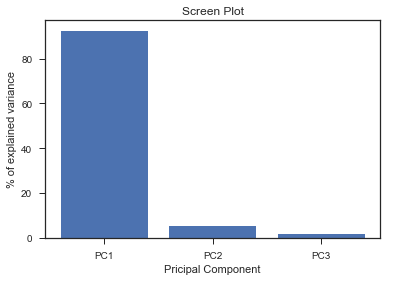

In [24]:
labels=['PC'+str(x) for x in range(1,len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1),height=per_var,tick_label=labels)
plt.ylabel('% of explained variance')
plt.xlabel("Pricipal Component")
plt.title("Screen Plot")
plt.show()

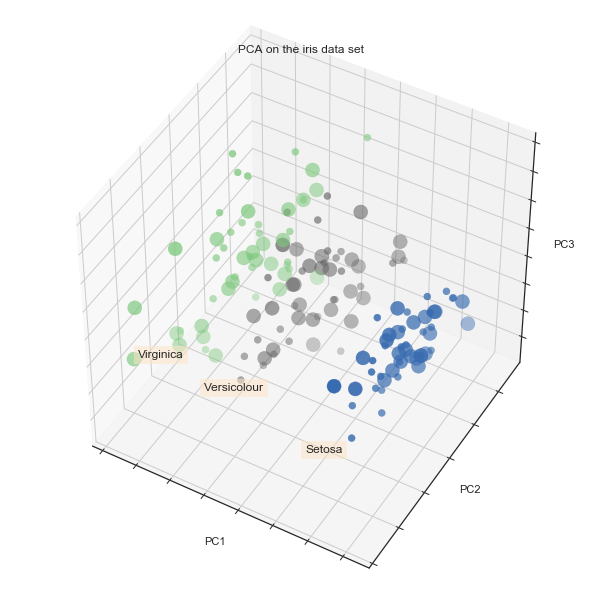

In [30]:
# Define figure size
fig = plt.figure(1, figsize=(4,4))
plt.clf()

# Define axis size, elevation and azimuth
ax = Axes3D(fig, rect=[0, 0, 2, 2], elev=45, azim=120)
plt.cla()

# Define the location of the labels of each species of Iris
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_PCA[y == label, 0].mean(), X_PCA[y == label, 1].mean() + 1.5 ,X_PCA[y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='bisque'))
    
    
# Change the order of labels, so that they match
y_color = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y_color, 
           cmap='Accent', s=(50, 200))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

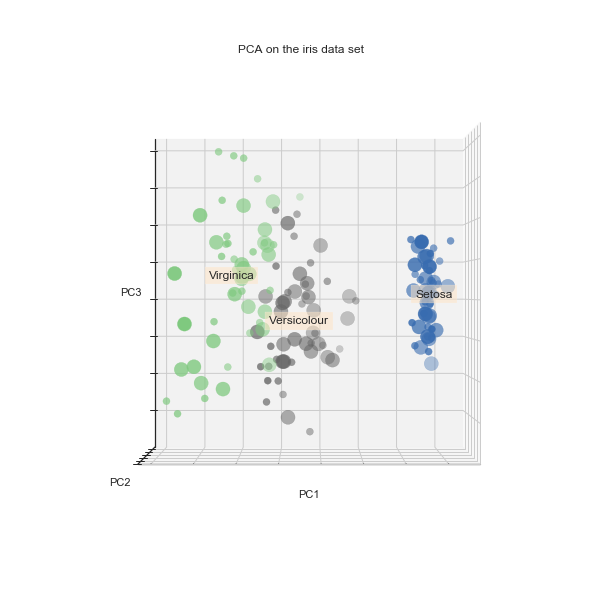

In [34]:
# Right-Side View
fig = plt.figure(1, figsize=(8,8))
plt.clf()

# Define axis size, elevation and azimuth
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=0, azim=90)
plt.cla()

# Define the location of the labels of each species of Iris
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_PCA[y == label, 0].mean(), X_PCA[y == label, 1].mean() + 1.5 ,X_PCA[y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='bisque'))
    
    
# Change the order of labels, so that they match
y_color = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y_color, 
           cmap='Accent', s=(50, 200))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

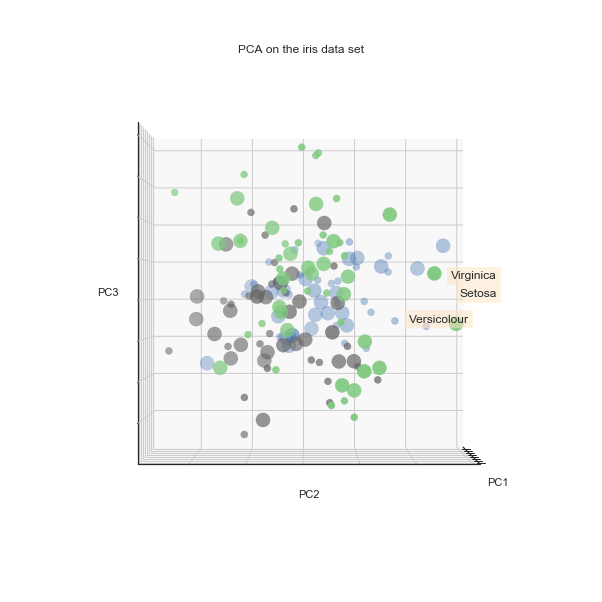

In [35]:
#Front View
fig = plt.figure(1, figsize=(8,8))
plt.clf()

# Define axis size, elevation and azimuth
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=0, azim=0)
plt.cla()

# Define the location of the labels of each species of Iris
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_PCA[y == label, 0].mean(), X_PCA[y == label, 1].mean() + 1.5 ,X_PCA[y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='bisque'))
    
    
# Change the order of labels, so that they match
y_color = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y_color, 
           cmap='Accent', s=(50, 200))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()

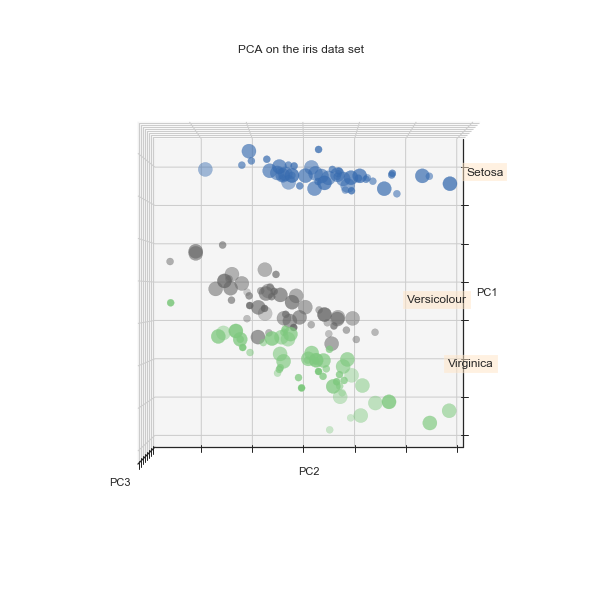

In [36]:
#Top View
fig = plt.figure(1, figsize=(8,8))
plt.clf()

# Define axis size, elevation and azimuth
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=90, azim=0)
plt.cla()

# Define the location of the labels of each species of Iris
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X_PCA[y == label, 0].mean(), X_PCA[y == label, 1].mean() + 1.5 ,X_PCA[y == label, 2].mean(), 
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='bisque'))
    
    
# Change the order of labels, so that they match
y_color = np.choose(y, [1, 2, 0]).astype(np.float)

ax.scatter(X_PCA[:, 0], X_PCA[:, 1], X_PCA[:, 2], c=y_color, 
           cmap='Accent', s=(50, 200))

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
plt.show()